<a href="https://colab.research.google.com/github/vedantdalvi7/Robustness-Evaluation-of-neural-network-based-image-processing-models/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

global classes_name
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 [==============================] - 14s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


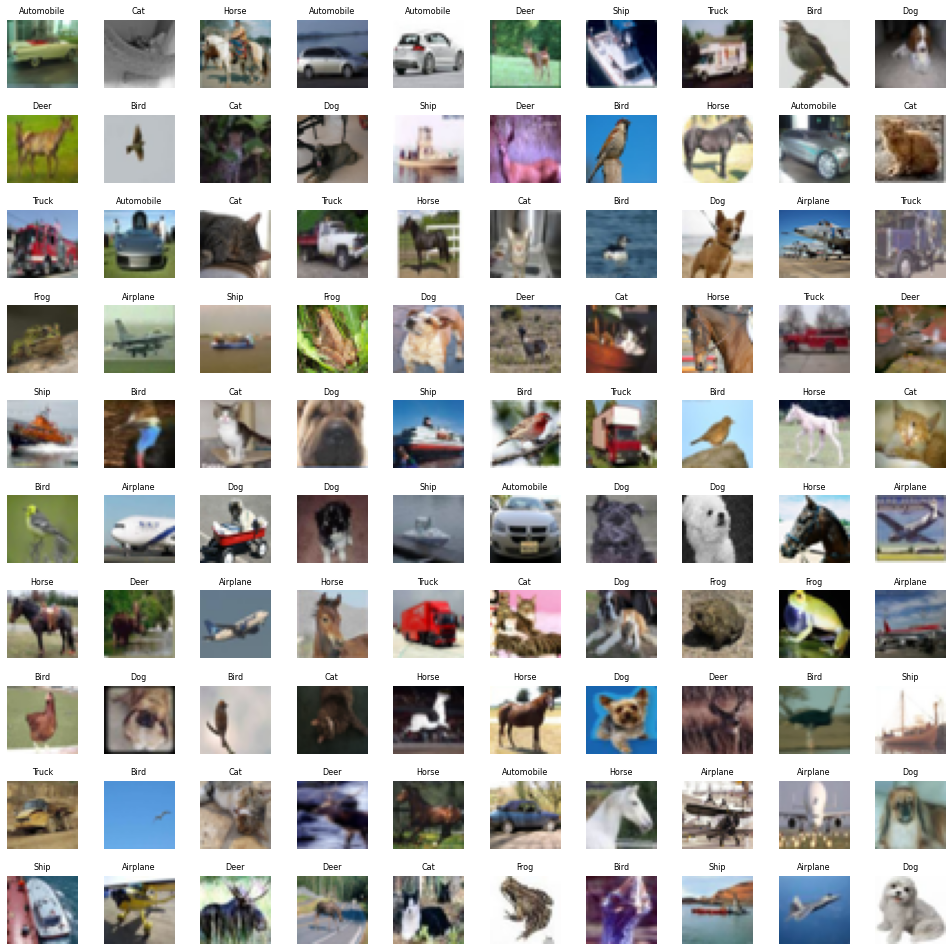

In [4]:
#Function to display data samples
def display_samples(x, y, classes_name):

          # Define the dimensions of the plot grid 
          W_grid = 10
          L_grid = 10
          
          # we can use the axes object to plot specific figures at various locations
          fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
          axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
          n_train = len(x) # get the length of the train dataset
          
          # Select a random number from 0 to n_train
          for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
            index = np.random.randint(0, n_train) 
            axes[i].imshow(x[index,1:]) # read and display an image with the selected index
            label_index = int(y[index])
            axes[i].set_title(classes_name[label_index], fontsize = 8)
            axes[i].axis('off')

          plt.subplots_adjust(hspace=0.4)

display_samples(X_train, y_train, classes_name)

In [5]:
# Scale the data

X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding

y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [6]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()
base_model = tf.keras.applications.resnet.ResNet152(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(32, 32, 3),
    pooling=None,
    classes=10,
    classifier_activation='softmax'
)

model.add(base_model)


model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

234698864/234698864 [==============================] - 13s 0us/step


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 1, 1, 2048)        58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 58,634,506
Trainable params: 58,483,082
No

In [9]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
batch_size = 128
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, epochs=30,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )


Epoch 1/30
391/391 [==============================] - 209s 242ms/step - loss: 1.4618 - accuracy: 0.5082 - precision: 0.7061 - recall: 0.3309 - val_loss: 2.8703 - val_accuracy: 0.1468 - val_precision: 0.0660 - val_recall: 7.0000e-04
Epoch 2/30
391/391 [==============================] - 86s 221ms/step - loss: 1.0780 - accuracy: 0.6383 - precision: 0.7715 - recall: 0.4982 - val_loss: 2.3375 - val_accuracy: 0.2600 - val_precision: 0.4132 - val_recall: 0.1542
Epoch 3/30
391/391 [==============================] - 89s 228ms/step - loss: 1.0697 - accuracy: 0.6356 - precision: 0.7727 - recall: 0.4943 - val_loss: 1.0097 - val_accuracy: 0.6594 - val_precision: 0.7565 - val_recall: 0.5737
Epoch 4/30
391/391 [==============================] - 88s 224ms/step - loss: 1.0057 - accuracy: 0.6573 - precision: 0.7850 - recall: 0.5280 - val_loss: 1.0296 - val_accuracy: 0.6681 - val_precision: 0.7530 - val_recall: 0.5946
Epoch 5/30
391/391 [==============================] - 87s 221ms/step - loss: 0.9362 - a

In [ ]:
model.save('content/drive/MyDrive/Research Project/Models/ResNet152')

In [ ]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

In [ ]:
#Function to generate confusion matrix
def CM(model, x, ycat_TEST, ytest):
  evaluation = model.evaluate(x, ycat_TEST)
  print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')
  
  y_pred = model.predict(x)
  y_pred = np.argmax(y_pred, axis=1)
  global cm
  cm = confusion_matrix(ytest, y_pred)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes_name)
  #print(cm)
  # NOTE: Fill all variables here with default values of the plot_confusion_matrix
  fig, ax = plt.subplots(figsize=(10, 10))
  disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='Greens')
  plt.grid(False)
  plt.show()   

In [ ]:
resnet152_model = keras.models.load_model('content/drive/MyDrive/Research Project/Models/ResNet152')
CM(resnet152_model, X_test, y_cat_test, y_test)